In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays

In [3]:
n = 50
p = 0.3
eta = 0.3

rng = Random.default_rng();
compGraph = gen_graph_mun(rng, n, p, eta);
B = magnetic_incidence(compGraph; oriented=true);
L = B*B';

### Leverage score approximation with monte carlo

relative error: 0.010546092690743077

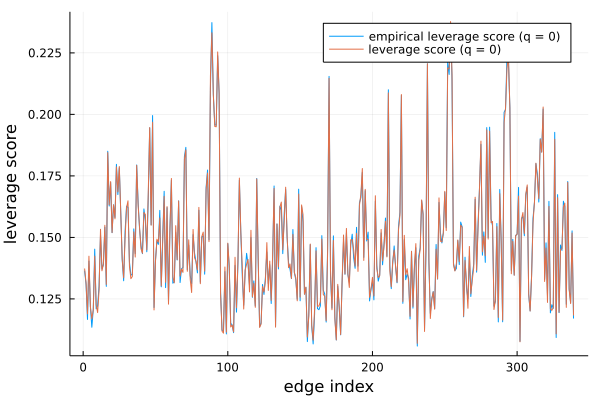

In [68]:
t= 50000;
q = 0;
empLev = empLeverageScore(rng, compGraph, q,  t);
lev = leverageScore(B, q);

print("relative error: ",norm(empLev - lev)/norm(lev))
plot(empLev,xlabel = "edge index",ylabel = "leverage score",labels="empirical leverage score (q = 0)");
plot!(lev,labels="leverage score (q = 0)")

### Condition number of preconditioned system vs number of CRSFs

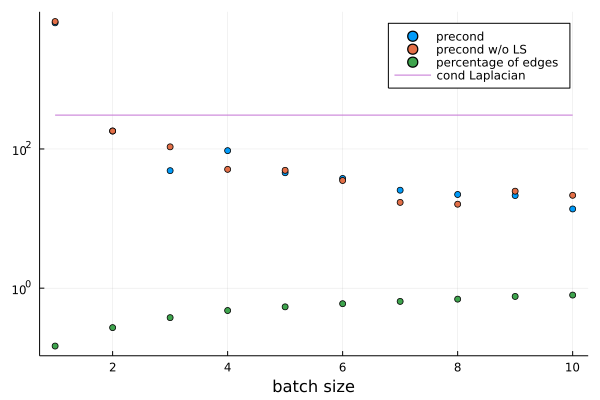

In [69]:
n = nv(compGraph);
m = ne(compGraph);

q = 0;
lev = leverageScore(B, q);

n_tot = 10;
cnd_number = zeros(n_tot,1);
cnd_number_no_lev = zeros(n_tot,1);

percent_edges = zeros(n_tot,1);
for i=1:n_tot
    avgL = averageSparsifier(rng,compGraph,lev,true,q,i);
    avgL_no_lev = averageSparsifier(rng,compGraph,lev,false,q,i);
    cnd_number[i] = cond(inv(avgL)*L);
    cnd_number_no_lev[i] = cond(inv(avgL_no_lev)*L);
    percent_edges[i] = nb_of_edges(avgL)/m;
end
scatter(1:n_tot,cnd_number, yaxis=:log,xlabel = "batch size",labels = "precond")
scatter!(1:n_tot,cnd_number_no_lev, yaxis=:log,xlabel = "batch size",labels = "precond w/o LS")
scatter!(1:n_tot,percent_edges,labels = "percentage of edges")
plot!(1:n_tot,cond(L)*ones(n_tot,1),labels = "cond Laplacian")



### eigenvalues approximation

percentage of number of edges : 0.36578171091445427

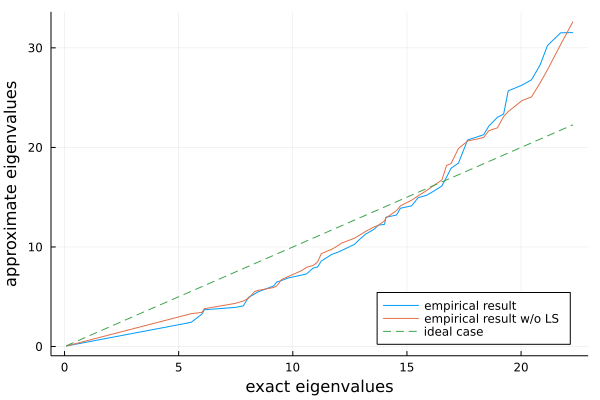

In [70]:
t = 3;
q = 0;
n = nv(compGraph);
m = ne(compGraph);

levScores = leverageScore(B, q);

avgL = averageSparsifier(rng,compGraph,levScores,true,q,t);
avgL_no_lev = averageSparsifier(rng,compGraph,levScores,false,q,t);

percent = ((nnz(sparse(avgL))-n)/2)/m;
print("percentage of number of edges : ", percent )
plot(real(eigvals(L)), real(eigvals(avgL)),xlabel = "exact eigenvalues",ylabel = "approximate eigenvalues", labels = "empirical result")
plot!(real(eigvals(L)), real(eigvals(avgL_no_lev)), labels = "empirical result w/o LS")

plot!(real(eigvals(L)), real(eigvals(L)),linestyle= :dash, labels = "ideal case",legend=:bottomright)

### Ranking
#### exact sync-rank

nb of edges: 339.0

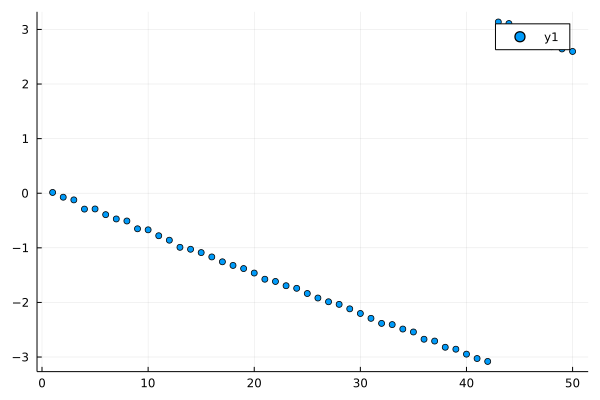

In [71]:
B = magnetic_incidence(compGraph; oriented=true);
L = B*B';

lam,v = eigs(L, nev=1, which=:SM);
print("nb of edges: ", nb_of_edges(L))

scatter(angular_score(v))

nb of edges: 128.0 over 339.0

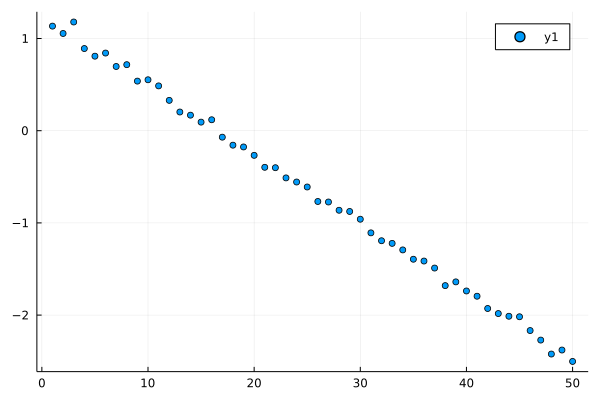

In [72]:
t = 3;
q = 0;
lev = leverageScore(B, q);

avgL = averageSparsifier(rng,compGraph,lev,true,q,t);
print("nb of edges: ", nb_of_edges(avgL), " over ", nb_of_edges(L))

lam,v = eigs(avgL, nev=1, which=:SM);
scatter(angular_score(v))

nb of edges: 127.0 over 339.0

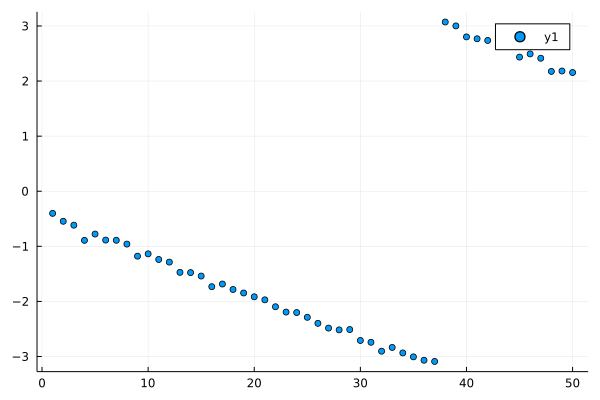

In [73]:
t = 3;
q = 0;
lev = leverageScore(B, q);
# without LS
avgL = averageSparsifier(rng,compGraph,lev,false,q,t);
print("nb of edges: ", nb_of_edges(avgL), " over ", nb_of_edges(L))
lam,v = eigs(avgL, nev=1, which=:SM);
scatter(angular_score(v))